In [1]:
%matplotlib inline

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Softmax
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [37]:
import matplotlib

In [38]:
matplotlib.__version__

'3.5.2'

# Basic classification: Classify images of clothing

https://www.tensorflow.org/tutorials/keras/classification

## Import

In [3]:
(training_images, training_classes), (test_images, test_classes)  = fashion_mnist.load_data()

In [4]:
training_images.shape, training_classes.shape

((60000, 28, 28), (60000,))

In [5]:
test_images.shape, test_classes.shape

((10000, 28, 28), (10000,))

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore

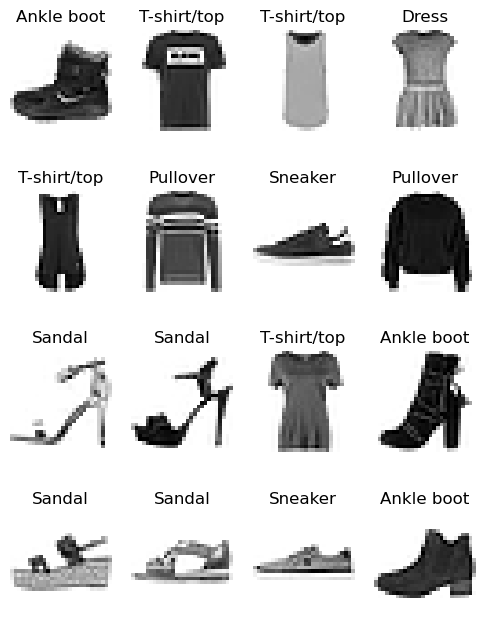

In [7]:
plt.figure(figsize=(6,8))

for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(training_images[i], cmap='gray_r')
    plt.axis('off')
    plt.title(class_names[training_classes[i]])
    
plt.show()

## Preprocess

### Normalize

In [8]:
training_images = training_images / 255
test_images = test_images / 255

## Build model

### Set up layers

In [9]:
INPUT_SHAPE = training_images[0].shape
N_CLASSES = len(set(training_classes))

INPUT_SHAPE, N_CLASSES

((28, 28), 10)

In [10]:
model = Sequential([
    Input(shape=INPUT_SHAPE),
    Flatten(),
    Dense(units=128, activation='relu'),
    Dense(units=N_CLASSES)
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### Compile

In [12]:
model.compile(
    optimizer='adam',
    loss=SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy',],
)

## Train model

### Feed

In [13]:
model.fit(
    training_images, 
    training_classes,
    epochs=10, 
)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4997 - accuracy: 0.8245
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3761 - accuracy: 0.8628
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3384 - accuracy: 0.8768
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3113 - accuracy: 0.8841
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2939 - accuracy: 0.8916
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2799 - accuracy: 0.8958
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2682 - accuracy: 0.9003
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2562 - accuracy: 0.9041
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2479 - accuracy: 0.9075
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.23

### Eval

In [17]:
test_loss, test_acc = model.evaluate(test_images, test_classes, verbose=2)

313/313 - 1s - loss: 0.3296 - accuracy: 0.8865 - 1s/epoch - 4ms/step


313 gradient updates * 32 batch size = 10K # of test samples

In [19]:
test_loss

0.3296394646167755

In [20]:
test_acc

0.8865000009536743

### Predict

logits https://developers.google.com/machine-learning/glossary#logits

In [22]:
prob_model = Sequential([
    model,
    Softmax(),
])

In [27]:
probabilities = prob_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [30]:
probabilities.shape

(10000, 10)

### Verify

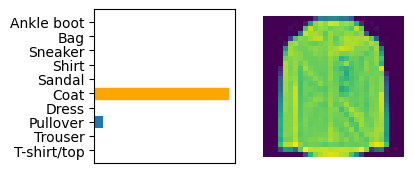

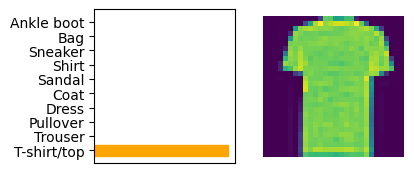

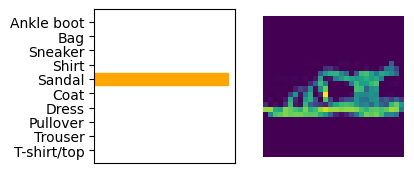

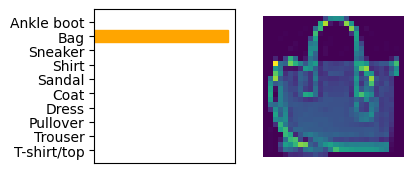

In [92]:
def plot_model_prediction(i):
    fig, axs = plt.subplots(1, 2, figsize=(4,2))

    bars = axs[0].barh(class_names, probabilities[i])
    max_prob = np.argmax(probabilities[i])  # highest confidence value
    bars[max_prob].set_color('orange')
    axs[0].set_xticks([])

    axs[1].imshow(test_images[i])
    axs[1].axis('off')

    plt.show()
    
for i in np.random.randint(0, len(test_images), 4):
    plot_model_prediction(i)

## Build and train model #2

`softmax` activation on the output layer and `from_logits=False` on the loss function.

In [14]:
model2 = Sequential([
    Input(shape=INPUT_SHAPE),
    Flatten(),
    Dense(units=128, activation='relu'),
    Dense(units=N_CLASSES, activation='softmax')
])

In [15]:
model2.compile(
    optimizer='adam',
    loss=SparseCategoricalCrossentropy(),
    metrics=['accuracy',],
)

In [16]:
model2.fit(
    training_images, 
    training_classes,
    epochs=10, 
)

Epoch 1/10
1875/1875 [==============================] - 10s 4ms/step - loss: 0.5053 - accuracy: 0.8227
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3785 - accuracy: 0.8630
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3393 - accuracy: 0.8763
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3179 - accuracy: 0.8837
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2974 - accuracy: 0.8911
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2823 - accuracy: 0.8962
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2721 - accuracy: 0.8987
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2587 - accuracy: 0.9031
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2492 - accuracy: 0.9076
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.23

## Use

### Single image

In [93]:
img = test_images[1]

# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

In [95]:
predictions_single = prob_model.predict(img)
predictions_single

1/1 [==============================] - 0s 114ms/step


array([[2.8516868e-05, 2.8511993e-11, 9.9553972e-01, 2.7767527e-07,
        2.4759988e-03, 5.8688820e-10, 1.9554559e-03, 7.5683643e-13,
        1.4096933e-09, 8.3189629e-13]], dtype=float32)